In [55]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df=pd.read_csv("/kaggle/input/dogs-dataset-3000-records/dogs_dataset.csv")

In [34]:
df

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male
...,...,...,...,...,...
2995,Siberian Husky,5,25,Tan,Female
2996,Vizsla,11,34,Blue,Female
2997,Pekingese,4,49,Bicolor,Male
2998,Samoyed,13,7,Blue,Female


In [35]:
label=LabelEncoder()
df["gender"]=label.fit_transform(df["Gender"])

In [36]:
transform=ColumnTransformer(transformers=[
    ('one_hot',OneHotEncoder(),["Breed","Color"])
])

In [37]:
sd=transform.fit_transform(df)
sd1=sd.toarray()
sd2=pd.DataFrame(sd1,columns=transform.get_feature_names_out())
sd2.columns

Index(['one_hot__Breed_Airedale Terrier', 'one_hot__Breed_Akita',
       'one_hot__Breed_Alaskan Malamute', 'one_hot__Breed_Australian Shepherd',
       'one_hot__Breed_Basenji', 'one_hot__Breed_Beagle',
       'one_hot__Breed_Belgian Malinois',
       'one_hot__Breed_Bernese Mountain Dog', 'one_hot__Breed_Bichon Frise',
       'one_hot__Breed_Bloodhound', 'one_hot__Breed_Border Collie',
       'one_hot__Breed_Boston Terrier', 'one_hot__Breed_Boxer',
       'one_hot__Breed_Bull Terrier', 'one_hot__Breed_Bulldog',
       'one_hot__Breed_Cavalier King Charles Spaniel',
       'one_hot__Breed_Chesapeake Bay Retriever', 'one_hot__Breed_Chihuahua',
       'one_hot__Breed_Chinese Shar-Pei', 'one_hot__Breed_Cocker Spaniel',
       'one_hot__Breed_Dachshund', 'one_hot__Breed_Doberman Pinscher',
       'one_hot__Breed_Dogo Argentino', 'one_hot__Breed_French Bulldog',
       'one_hot__Breed_German Shepherd', 'one_hot__Breed_Golden Retriever',
       'one_hot__Breed_Great Dane', 'one_hot__Breed_H

In [38]:
new_df=pd.concat([df,sd2],axis=1)
new_df=new_df.drop(columns=["Breed",'Color',"Gender"])
new_df

,Age (Years),Weight (kg),gender,one_hot__Breed_Airedale Terrier,one_hot__Breed_Akita,one_hot__Breed_Alaskan Malamute,one_hot__Breed_Australian Shepherd,one_hot__Breed_Basenji,one_hot__Breed_Beagle,one_hot__Breed_Belgian Malinois,...,one_hot__Color_Brown,one_hot__Color_Cream,one_hot__Color_Gray,one_hot__Color_Merle,one_hot__Color_Red,one_hot__Color_Sable,one_hot__Color_Spotted,one_hot__Color_Tan,one_hot__Color_Tricolor,one_hot__Color_White
0,13,35,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10,43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9,57,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,39,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2996,11,34,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,4,49,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,13,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X=new_df.drop(columns=["gender"])

Y=new_df["gender"]

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [41]:
Y_train.unique()

array([1, 0])

In [44]:
random_class=RandomForestClassifier()
# multi_output=MultiOutputClassifier(random_class)
random_class.fit(X_train,Y_train)
random_class.score(X_test,Y_test)

0.525

In [43]:
svc=SVC()
svc.fit(X_train,Y_train)
svc.score(X_test,Y_test)

0.505

In [47]:
kn=KNeighborsClassifier()
kn.fit(X_train,Y_train)
kn.score(X_test,Y_test)

0.49166666666666664

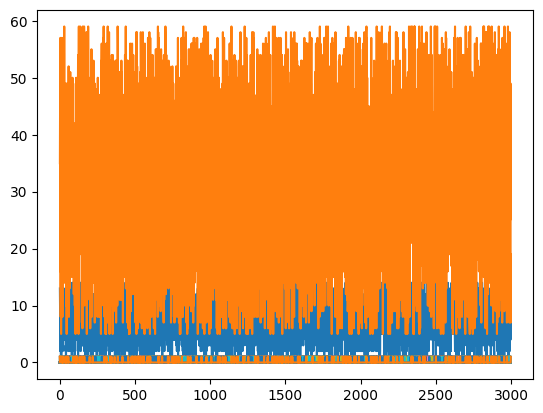

In [53]:
new_df.plot()
plt.legend().set_visible(False)

after corellation

<Axes: >

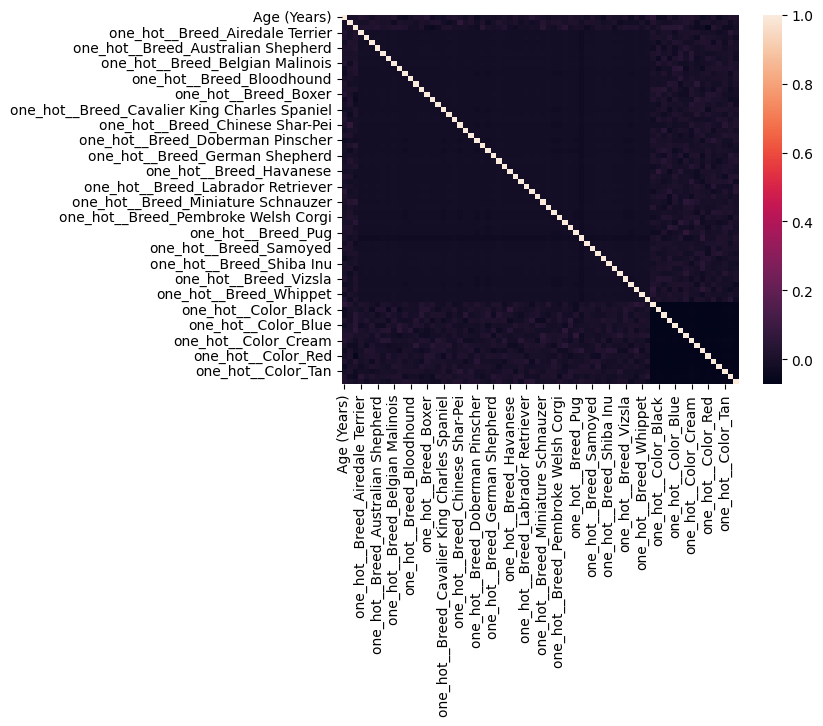

In [56]:
cor=new_df.corr()
sns.heatmap(cor)

before correlation

<Axes: >

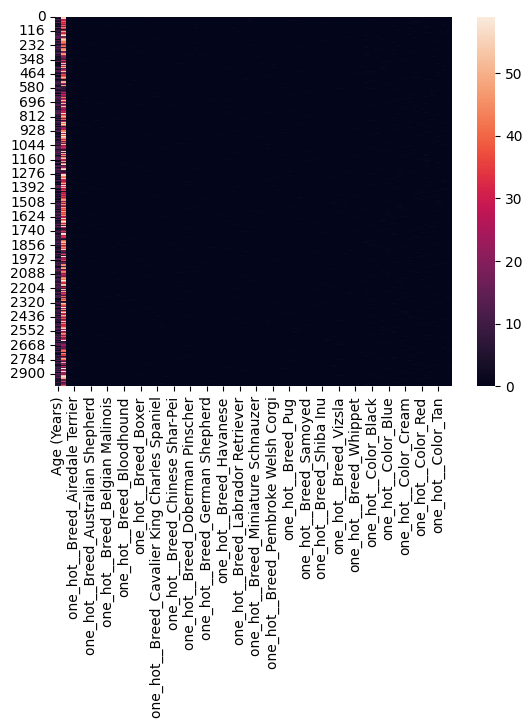

In [57]:
sns.heatmap(new_df)